# K-Nearest Neighbor

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. 
KNN is easy to implement in its most basic form, and yet performs quite complex classification tasks. It is a lazy learning algorithm because it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption.

A description from [https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is:

>In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric classification method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover. It is used for classification and regression. In both cases, the input consists of the k closest training examples in a data set. The output depends on whether k-NN is used for classification or regression:
>
> - In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
>
> - In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.
>
>k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically.
>
>Both for classification and regression, a useful technique can be to assign weights to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor.
>
>The neighbors are taken from a set of objects for which the class (for k-NN classification) or the object property value (for k-NN regression) is known. This can be thought of as the training set for the algorithm, though no explicit training step is required.
>
>A peculiarity of the k-NN algorithm is that it is sensitive to the local structure of the data. 
> ...

## Background
The First Law of Geography, according to Waldo Tobler, is "everything is related to everything else, but near things are more related than distant things." 
The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms: 

<div><img src="https://geohealthinnovations.org/wp-content/uploads/2013/01/toblerquote.png" width="200" align="left" style="padding-right: 20px"></div> 

- It calculates the distance of a new data point to all other training data points. 
- The distance can be of any type e.g Euclidean or Manhattan etc. 
- It then selects the K-nearest data points, where K can be any integer. 
- Used as a classifier; it assigns the data point to the class to which the majority of the K data points belong.
- Used as a predictor; it assigns to the data point a mean prediction value based on the associated values of the K data points. 
- An example of KNN as a predictor is the [SolidsInRivers](http://54.243.252.9/toolbox/geomorphology/SolidsInRivers/SolidsInRivers.html) estimation tool.
<br><br>

### Concept of Distance in N-Dimensional Space
The concept of distance is vital to search engines; hence distance measures play an important role in machine learning. Three common used distance measures in machine learning are as follows:

<div><img src="https://miro.medium.com/max/1576/1*vAtQZbROuTdp36aQQ8cqBA.png" width="500" align="left" style="padding-right: 20px"></div> 
        
- Euclidean Distance: 
Calculates the distance between two real-valued vectors. Although there are other possible choices, most instance-based learners use Euclidean distance.
        
- Manhattan Distance: 
Also called the Taxicab distance or the City Block distance, calculates the distance between two real-valued vectors. It is perhaps more useful to vectors that describe objects on a uniform grid, like a chessboard or city blocks. The taxicab name for the measure refers to the intuition for what the measure calculates: the shortest path that a taxicab would take between city blocks (coordinates on the grid).
        
- Minkowski Distance: 
Calculates the distance between two real-valued vectors. It is a generalization of the Euclidean and Manhattan distance measures and adds a parameter, called the “order” or “p“, that allows different distance measures to be calculated. When p is set to 1, the calculation is the same as the Manhattan distance. When p is set to 2, it is the same as the Euclidean distance.  

The [SolidsInRivers](http://54.243.252.9/toolbox/geomorphology/SolidsInRivers/SolidsInRivers.html) estimation tool, allows the user to specify the exponent in a Minkowski distance measure, and select the neighbor count (K).  Then it searches the database for the K nearest neighbors, and returns an estimate that is the arithmetic mean of these K values.

### Data Normalization
In KNN application the scale of predictors influences results; when the variables in the database are not expressed in the same magnitude, range, and scale. If values of one predictor are several orders of magnitude larger in the database than another predictor, the two are not directly comparable when computing a distance for the search algorithm. In such a case, one way to facilitate direct interpretation for comparing composite indices of the original data having different magnitudes and unit systems is to use normalization. Normalization serves the purpose of bringing the indicators into the same unit scale or unit base and makes distance computations appropriate. Normalizing data is done using various standardization techniques to assign a value to each variable so that they may be directly compared without unintentional bias due to differences in unit scale.
#### Z-score Standardization
Z-score standardization is a commonly used normalization method that converts all indicators to a common scale with an average of zero and standard deviation of one. 
This transformation is the same as computing a standard-normal score for each data value. 

$Z = \frac{x-\mu}{\sigma}$

where:<br>
$x$ = Data point value <br>
$\mu$ = Mean <br>
$\sigma$ = Standard Deviation<br>


The average of zero avoids the introduction of aggregation distortions stemming from differences in indicators’ means. 
The scaling factor is the standard deviation of the indicator across the various predictors being ranked. 
Thus, an indicator with extreme values will have intrinsically a greater effect on the composite indicator. 
The raw score on each data entry is converted to a Z-score, then distances are calculated using the Z-scores for each variable rather than the raw value. Upon completion of the distance calculations and selection of the nearest neighbors, the results are transformed back into the original values for subsequent presentation. Unit-Interval 

#### [0,1] Standardization
An alternate approach for standardization is to use a mapping of each variable in the database to a [0,1] scale and linearly weight within the scale. 
This standardization has the same goal as Z-score, which is to prevent one variable from overwhelming the distance computations because of its relative magnitude. 
The unit interval [0,1] standardization technique differs from the Z-score in that the variability is governed by the minimum and maximum value for each variable, and hence **extrapolation is not feasible**. Because extrapolation is likely necessary until new records are added to any database, this standardization method is often useless.

## Simple Demonstrative Example

Let's see this algorithm in action with the help of a simple example. Suppose you have a dataset with two variables, which when plotted, looks like the one in the following figure.

<img src="https://s3.amazonaws.com/stackabuse/media/k-nearest-neighbors-algorithm-python-scikit-learn-1.png" width="500">

Your task is to classify a new data point with 'X' into "Blue" class or "Red" class. The coordinate values of the data point are x=45 and y=50. Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X from all the points. It then finds the 3 nearest points with least distance to point X. This is shown in the figure below. The three nearest points have been encircled.

<img src="https://s3.amazonaws.com/stackabuse/media/k-nearest-neighbors-algorithm-python-scikit-learn-2.png" width="500">


The final step of the KNN algorithm is to assign new point to the class to which majority of the three nearest points belong. From the figure above we can see that the two of the three nearest points belong to the class "Red" while one belongs to the class "Blue". Therefore the new data point will be classified as "Red".

<img src="https://miro.medium.com/max/1080/0*49s1xDlDKDsn55xa.gif" width="500">


## Why KNN?

<img src="https://miro.medium.com/max/1022/1*AuXDgGrr0wbCoF6KDXXSZQ.jpeg" width="200" align="left" style="padding-right: 20px">

- It is extremely easy to implement
- It is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
- Because the algorithm requires no training before making predictions, new data can be added seamlessly.
- There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)
<br><br>



## Classic Example: Iris Plants Classification <br>

<img src="https://i.etsystatic.com/10589108/r/il/213b38/1876572420/il_570xN.1876572420_ikcm.jpg" width="200" align="left" style="padding-right: 20px"> 

This is a well known problem and database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day. 
The Iris Flower Dataset involves predicting the flower species given measurements of iris flowers. 

The Iris Data Set contains information on sepal length, sepal width, petal length, petal width all in cm, and class of iris plants. 
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 
Hence, it is a multiclass classification problem and the number of observations for each class is balanced.

<img src="https://miro.medium.com/max/1000/1*lFC_U5j_Y8IXF4Ga87KNVg.png" width="500"><br>


Let's use a KNN model in Python and see if we can classifity iris plants based on the four given predictors.

<hr>

:::{note}
The Iris classification example that follows is largely sourced from:
1. *Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950).*
2. *Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis. (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.*
3. *Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System Structure and Classification Rule for Recognition in Partially Exposed Environments".  IEEE Transactions on Pattern Analysis and Machine Intelligence, Vol. PAMI-2, No. 1, 67-71.*
4. *Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions on Information Theory, May 1972, 431-433.*      
5. *See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al's AUTOCLASS II conceptual clustering system finds 3 classes in the data.*
:::

Load some libraries:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
%matplotlib inline

Read the dataset and explore it using tools such as descriptive statistics:

In [2]:
# Read the remote directly from its url (Jupyter):
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.tail()

,sepal-length,sepal-width,petal-length,petal-width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Split the predictors and target - similar to what we did for logisitc regression:

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

Then, the dataset should be split into training and testing. This way our algorithm is tested on un-seen data, as it would be in a real-world application. Let's go with a 80/20 split:

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#This means that out of total 150 records:
#the training set will contain 120 records & 
#the test set contains 30 of those records.

It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn. The first step is to import the "KNeighborsClassifier" class from the "sklearn.neighbors" library. In the second line, this class is initialized with one parameter, i.e. "n_neigbours". This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

The final step is to make predictions on our test data. To do so, execute the following script:

In [8]:
y_pred = classifier.predict(X_test)

As it's time to evaluate our model, we will go to our rather new friends, confusion matrix, precision, recall and f1 score as the most commonly used discrete GOF metrics.

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Text(0.5, 15.0, 'Actual label')

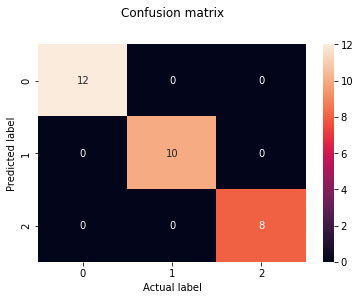

In [10]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

What if we had used a different value for K? What is the best value for K?

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset. In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 50. To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 50:

In [11]:
error = []

# Calculating error for K values between 1 and 50
# In each iteration the mean error for predicted values of test set is calculated and
# the result is appended to the error list.
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

The next step is to plot the error values against K values:

Text(0, 0.5, 'Mean Error')

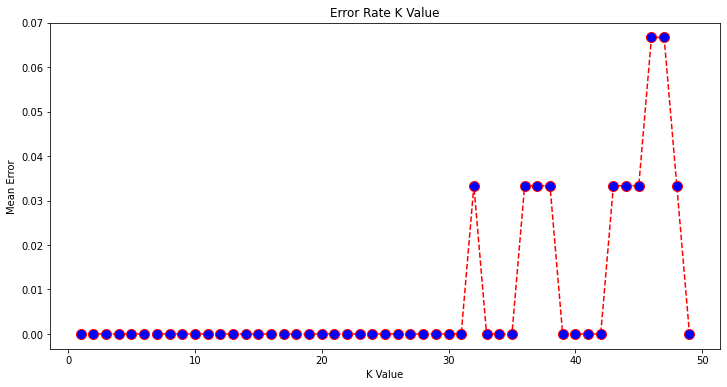

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

<hr>
<hr>

### Final remarks ...

- KNN is a simple yet powerful classification algorithm.
- It requires no training for making predictions, which is typically one of the most difficult parts of a machine learning algorithm.
- The KNN algorithm have been widely used to find document similarity and pattern recognition.

Here we presented it as a classifier, however if the output needs to be a predictor we can use "regression" type prediction using the KNN values to parameterize a data model.

We will leave the task of making classifications of new inputs for a lab exercise.


## From Plants to Engineering

Classification in engineering is every bit as important and commonly needed as it might be with plants. Lets use our 
**pickone** database to explore how we might employ KNN in an engineering context.

## References
1. Chan, Jamie. Machine Learning With Python For Beginners: A Step-By-Step Guide with Hands-On Projects (Learn Coding Fast with Hands-On Project Book 7) (p. 2). Kindle Edition. 
2. [Burkov, A. (2019) "The Hundred Page Machine Learning Book"  pp. 15-16](http://ema.cri-info.cm/wp-content/uploads/2019/07/2019BurkovTheHundred-pageMachineLearning.pdf)
3.  [Sampaio, C. (2022) "K-Nearest Neighbors Algorithm in Python and Scikit-Learn"](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/) <br>
4. [Brownlee, J. (2019) "Develop k-Nearest Neighbors in Python From Scratch"](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)<br>
5. [Brownlee, J. (2020) "4 Distance Measures for Machine Learning"](https://machinelearningmastery.com/distance-measures-for-machine-learning/) <br>
6. [Navlani, A. (2018) "KNN Classification using Scikit-learn"](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn) <br>
10. [Zoltan, C. (2018) "KNN in Python"](https://towardsdatascience.com/knn-in-python-835643e2fb53) <br>
11. [Maklin, C. (2019) "K Nearest Neighbor Algorithm In Python"](https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55) <br>
12. [tavishaggarwal1993 (2022) "k-nearest neighbor algorithm in Python"](https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/)  Author's name is an avatar<br>

## Videos

1. ["K-nearest neighbors, Clearly Explained" by Josh Starmer](https://www.youtube.com/watch?v=HVXime0nQeI) <br>
2. ["How KNN algorithm works" by Thales Sehn Körting](https://www.youtube.com/watch?v=UqYde-LULfs)<br>
3. ["KNN Algorithm Using Python | How KNN Algorithm Works | Data Science For Beginners | Simplilearn" by Simplilearn ](https://www.youtube.com/watch?v=4HKqjENq9OU) <br>
